# Bode Grafiken

Man kann mit Python auch Bode-Plots erstellen; es gibt mehrere Bibliotheken, die gut funktionieren, wie zum Beispiel **SciPy** oder **Control**. Für die erste Aufgabe schauen wir uns an, wie es mit der Control-Bibliothek funktioniert. Zwei gute Wikis könnt ihr direkt in den nächsten Links finden:

- [https://python-control.readthedocs.io/en/0.10.1/](https://python-control.readthedocs.io/en/0.10.1/)
- [https://ethz.ch/content/dam/ethz/special-interest/mavt/dynamic-systems-n-control/idsc-dam/Lectures/Control-Systems-2/Exercises/python-control.pdf](https://ethz.ch/content/dam/ethz/special-interest/mavt/dynamic-systems-n-control/idsc-dam/Lectures/Control-Systems-2/Exercises/python-control.pdf)

Jetzt sehen wir ein paar Beispiele, erst müssen wir die notwendige Bibliotheken laden.

In [14]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

### Control-Bibliothek Funktionen

Man kann ein Übertragungsfunktion mit dem Befehl **ctrl.TransferFunction()** stellen. Diese Funktion nimmt den Koeffizienten von den Zähler und Nenner Polynomen als ein array. Zum Beispiel, für die Übertragungsfunktion:

$$G(s) = \frac{s+1}{s^2 + 2s +1}$$

mann merkt dann, dass der Vektor für den Zähler **[1,1]** ist, denn wir haben zwei Elemente, die beide ein Koeffizient von 1 haben. Für den Nenner ist es so als **[1,2,1]**, weil wir drei Elementen haben, die als Koeffizienten 1, 2, 1 haben. Jetzt wollen wir diese Übertragungsfunktion in Python definieren und analysieren:

In [15]:
G = ctrl.TransferFunction([1,1], [1,2,1])

print("Transfer Function G(s):")
G

Transfer Function G(s):


TransferFunction(array([1, 1]), array([1, 2, 1]))

### Beispiel # 1: P-Glied

Unser P-Glied, wo $P$ steht für *Proportional* ist beschrieben als 

$$y(t) = Ku(t)$$

und $K$ ist eine Verstärkung. Wir können dann die Laplace Transformation finden:

$$\mathcal{L}\{y(t)\} = Y(s) = KU(s)$$

$$\Rightarrow \boxed{G(s) = \frac{Y(s)}{U(s)}= K}$$

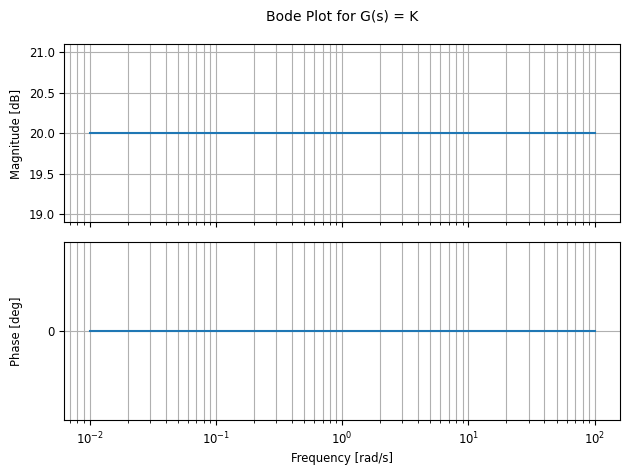

In [16]:
# Nimm die Übertragungsfunktion G(s) = K, mit K = 10
K = 10
G = ctrl.TransferFunction([K], [1])

# Skizziere den Frequenzgang der Übertragungsfunktion mit dem Frequenzbereich von 0.01 bis 100 rad/s
w = np.logspace(-2, 2, 100)
out = ctrl.bode(G, w, dB=True)

# Plotten
out.set_plot_title("Bode Plot for G(s) = K")
plt.show()


### Besipiel # 2: I-Glied

Der I-Glied, mit $I$ für *Integration* ist beschrieben als 

$$\dot{y}(t) = u(t)$$

Unsere Laplace Transformation gilt dann:

$$\mathcal{L}\{\dot{y}(t)\} = sY(s) = U(s)$$

$$\Rightarrow \boxed{G(s) = \frac{Y(s)}{U(s)}= \frac{1}{s}}$$

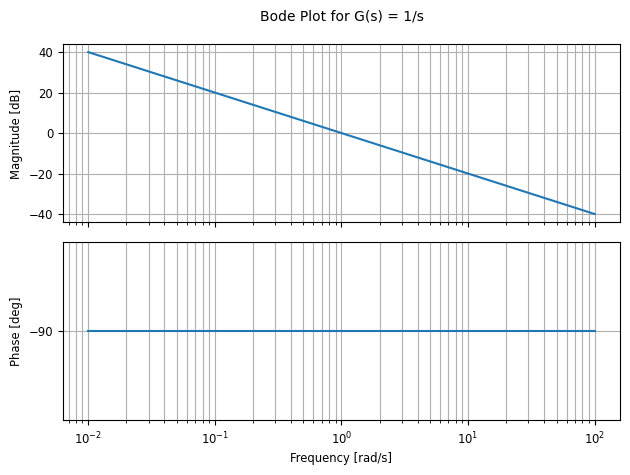

In [17]:
# Nimm die Übertragungsfunktion G(s) = 1/s (Integrationsglied)
G = ctrl.TransferFunction([1], [1,0])

# Skizziere den Frequenzgang der Übertragungsfunktion mit dem Frequenzbereich von 0.01 bis 100 rad/s
w = np.logspace(-2, 2, 100)
out = ctrl.bode(G, w, dB=True)

# Plotten
out.set_plot_title("Bode Plot for G(s) = 1/s")
plt.show()

### Besipiel # 3: D-Glied

Der D-Glied ist beschreibt als $D$ für *Differential* und die funktion ist gegeben als

$$y(t) = \dot{u}(t)$$

Die Laplace Transformation gilt dann:

$$\mathcal{L}\{\dot{y}(t)\} = Y(s) = sU(s)$$

$$\Rightarrow \boxed{G(s) = \frac{Y(s)}{U(s)} = s}$$

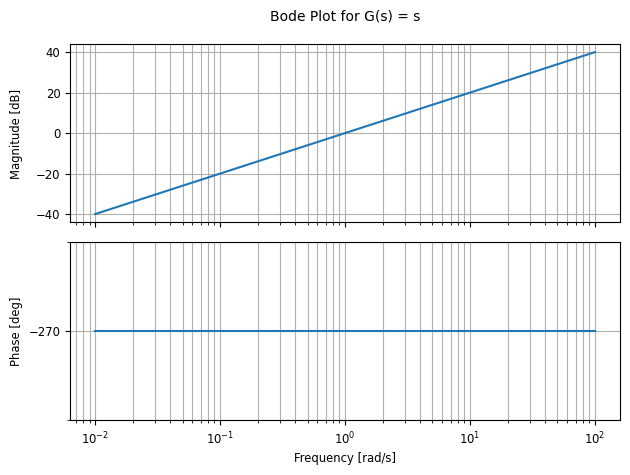

In [18]:
# Nimm die Übertragungsfunktion G(s) = s (Differentialglied)
G = ctrl.TransferFunction([1,0], [1])

# Skizziere den Frequenzgang der Übertragungsfunktion mit dem Frequenzbereich von 0.01 bis 100 rad/s
w = np.logspace(-2, 2, 100)
out = ctrl.bode(G, w, dB=True)

# Plotten
out.set_plot_title("Bode Plot for G(s) = s")
plt.show()

### Beispiel # 4: T1-Glied

Jetzt haben wir ein T1-Glied mit der funktion als

$$T\dot{y}(t) + y(t) = Ku(t)$$

und $T$ als Zeitkonstant und Verstärkung $K$. Die Laplace Transformation gilt dann:

$$\mathcal{L}\{T\dot{y}(t) + y(t) = Ku(t)\}$$

$$\Rightarrow TsY(s) + Y(s) = KU(s)$$

$$\Rightarrow \boxed{G(s) = \frac{Y(s)}{U(s)} = \frac{K}{Ts + 1}}$$

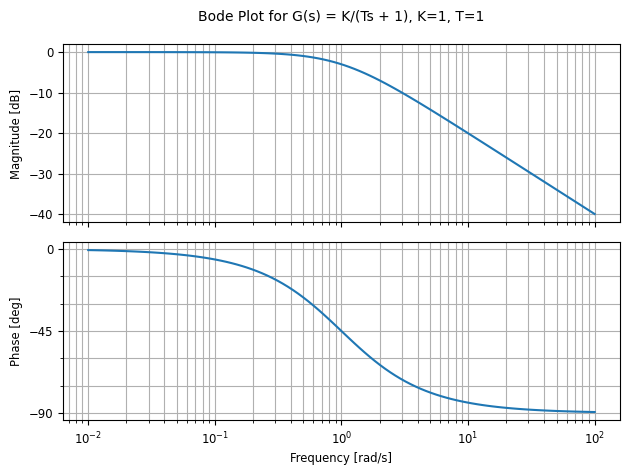

In [19]:
# Nimm die Übertragungsfunktion G(s) = K/(Ts + 1) (PT1-Glied)
K = 1
T = 1
G = ctrl.TransferFunction([K], [T, 1])

# Skizziere den Frequenzgang der Übertragungsfunktion mit dem Frequenzbereich von 0.01 bis 100 rad/s
w = np.logspace(-2, 2, 100)
out = ctrl.bode(G, w, dB=True)

# Plotten
out.set_plot_title("Bode Plot for G(s) = K/(Ts + 1), K=1, T=1")
plt.show()